## 1. Anomaly Detection (30 points)

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [11, 3, 8, 10, 12, 5, 1, 50]

Using a box plot, show the outliers in the box plot.

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score.

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

## Ans 1. Part A.

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from numpy import quantile, where, random
import scipy
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
from sklearn.decomposition import PCA
from math import sqrt, pi, exp, log
from numpy.random.mtrand import uniform
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

<ipython-input-1-c5471050e6c7>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Data

In [3]:
data = [11, 3, 8, 10, 12, 5, 1, 50]

Sort data in ascending order

In [4]:
data = sorted(data)
data

[1, 3, 5, 8, 10, 11, 12, 50]

Length of the data

In [5]:
n = len(data)

Calculating the Q1, Q2 and Q3

In [6]:
Q1 = (n) * (1/4)
Q2 = (n) * (2/4)
Q3 = (n) * (3/4)

Dividing the data into first, second, third and fourth quartile using Q1, Q2 and Q3

In [7]:
Q1 = int(Q1)
data[:Q1]

[1, 3]

In [8]:
Q2 = int(Q2)
data[Q1:Q2]

[5, 8]

In [9]:
Q3 = int(Q3)
data[Q2:Q3]

[10, 11]

In [10]:
data[Q3:]

[12, 50]

IQR = Q3 - Q1

In [11]:
IQR = Q3 - Q1
IQR

4

Upper fence = Q3 + ( 1.5  *  IQR )

In [12]:
upperfence = Q3 + (1.5 * IQR)
upperfence

12.0

Lower fence = Q1 - ( 1.5  *  IQR )

In [13]:
lowerfence = Q1 - (1.5 * IQR)
lowerfence

-4.0

Detecting the outliers which lie outside the Inter Quartile Range

- above the upper fence
- below the lower fence

In [14]:
outliers = []
for i in data:
  if i > int(upperfence) or i < int(lowerfence):
    outliers.append(i)
outliers

[50]

Box plot to check the outliers

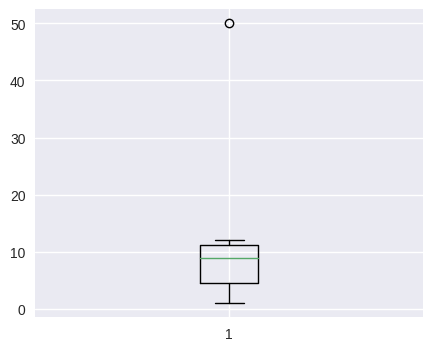

In [15]:
figure = plt.figure(figsize =(5, 4))
plt.boxplot(data)
plt.show()

## Part B.

Data

In [16]:
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]

Plotting the histogram of the data

(array([10.,  5.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3. ,  7.7, 12.4, 17.1, 21.8, 26.5, 31.2, 35.9, 40.6, 45.3, 50. ]),
 <BarContainer object of 10 artists>)

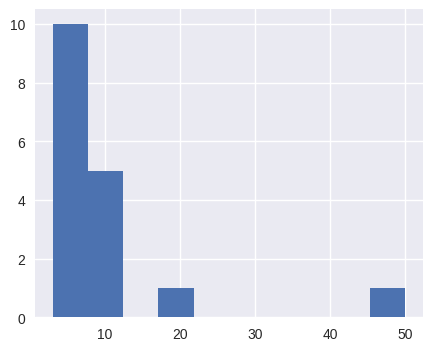

In [17]:
fig = plt.figure(figsize =(5, 4))
plt.hist(data)

The formula for Z score is:

Z = ( x - μ ) /  σ

where μ is the mean and σ is the standard deviation

Mean = ∑ xi / N

In [18]:
mean = sum(data) / len(data)
mean

9.411764705882353


Standard Deviation = √ ( ∑ ( xi - μ /  σ ) ) / N - 1

In [19]:
differences = []
for i in data:
  differences.append((i - mean)**2)
sum_of_differences = sum(differences)
std_deviation = (sum_of_differences / len(data) - 1) ** 0.5
std_deviation

10.887439192938382

In [20]:
outliers = []
for i in data:
  zscore = (i - mean) / std_deviation
  if zscore > 3 or zscore < -3:
    outliers.append(i)

outliers

[50]

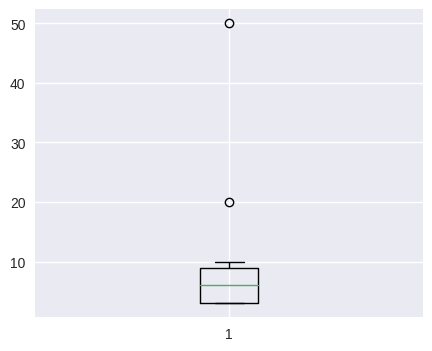

In [21]:
figure = plt.figure(figsize =(5, 4))
plt.boxplot(data)
plt.show()

## Part C.

Step 1

Importing data

In [22]:
data = "/content/Q1_dataset.csv"

In [24]:
data1 = pd.read_csv(data)
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Histogram

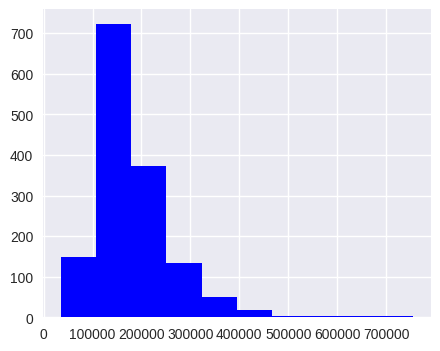

In [25]:
plt.figure(figsize=[5,4])
n, bins, patches = plt.hist(data1['SalePrice'], facecolor='blue')
plt.show()

Scatterplot

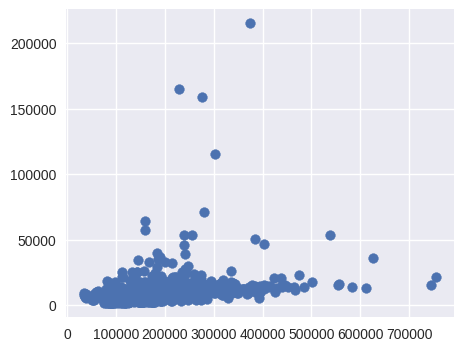

In [26]:
plt.figure(figsize=[5,4])
plt.scatter(data1['SalePrice'], data1['LotArea'])
plt.show()

Step 2

In [27]:
mean = sum(data1['SalePrice']) / len(data1['SalePrice'])
mean

180921.19589041095

In [28]:
differences = []
for i in data1['SalePrice']:
  differences.append((i - mean)**2)
sum_of_differences = sum(differences)
std_deviation = (sum_of_differences / len(data1['SalePrice']) - 1) ** 0.5
std_deviation

79415.2918797715

In [29]:
threshold1, threshold2 = 3, -3
outliers1 = []
for i in data1['SalePrice']:
  zscore = (i - mean) / std_deviation
  if zscore > threshold1 or zscore < threshold2:
    outliers1.append(i)

outliers1

[438780,
 501837,
 475000,
 437154,
 426000,
 555000,
 440000,
 430000,
 446261,
 451950,
 423000,
 755000,
 538000,
 485000,
 582933,
 611657,
 556581,
 424870,
 625000,
 745000,
 465000,
 466500]

In [30]:
threshold1, threshold2 = 2.5, -2.5
outliers2 = []
for i in data1['SalePrice']:
  zscore = (i - mean) / std_deviation
  if zscore > threshold1 or zscore < threshold2:
    outliers2.append(i)

outliers2

[385000,
 438780,
 383970,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 430000,
 402861,
 446261,
 451950,
 402000,
 423000,
 392000,
 755000,
 538000,
 395000,
 485000,
 582933,
 385000,
 611657,
 395192,
 556581,
 424870,
 625000,
 392500,
 745000,
 465000,
 381000,
 410000,
 466500,
 394617]

In [31]:
threshold1, threshold2 = 3.5, -3.5
outliers3 = []
for i in data1['SalePrice']:
  zscore = (i - mean) / std_deviation
  if zscore > threshold1 or zscore < threshold2:
    outliers3.append(i)

outliers3

[501837,
 475000,
 555000,
 755000,
 538000,
 485000,
 582933,
 611657,
 556581,
 625000,
 745000,
 465000,
 466500]

In [32]:
threshold1, threshold2 = 2, -2
outliers4 = []
for i in data1['SalePrice']:
  zscore = (i - mean) / std_deviation
  if zscore > threshold1 or zscore < threshold2:
    outliers4.append(i)

outliers4

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 340000,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 340000,
 394617]

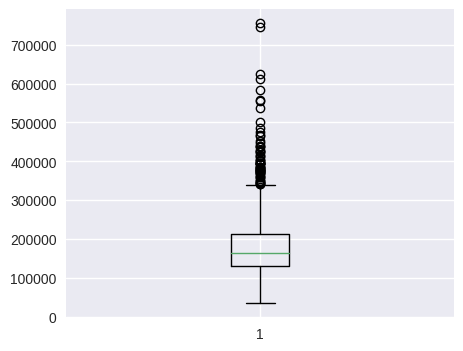

In [33]:
figure = plt.figure(figsize =(5, 4))
plt.boxplot(data1['SalePrice'])
plt.show()

Part 3.

In [34]:
len(outliers1)

22

In [35]:
len(outliers2)

40

In [36]:
len(outliers3)

13

In [37]:
len(outliers4)

63

Part 4.

In [38]:
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection

In [39]:
data11 = data1[['SalePrice', 'LotArea']]
X = data11.to_numpy()
X

array([[208500,   8450],
       [181500,   9600],
       [223500,  11250],
       ...,
       [266500,   9042],
       [142125,   9717],
       [147500,   9937]])

In [40]:
n_outliers = len(outliers1)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

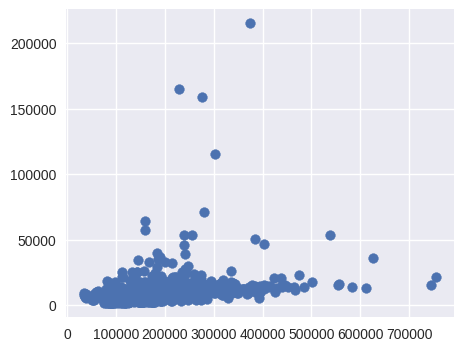

In [41]:
figure = plt.figure(figsize =(5, 4))
plt.scatter(data1['SalePrice'], data1['LotArea'])
plt.show()

In [42]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.03)

In [43]:
y_pred = clf.fit_predict(X)

In [44]:
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [45]:
def update_handler_marker_size(handle, orig):
  handle.update_from(orig)
  handle.set_sizes([20])

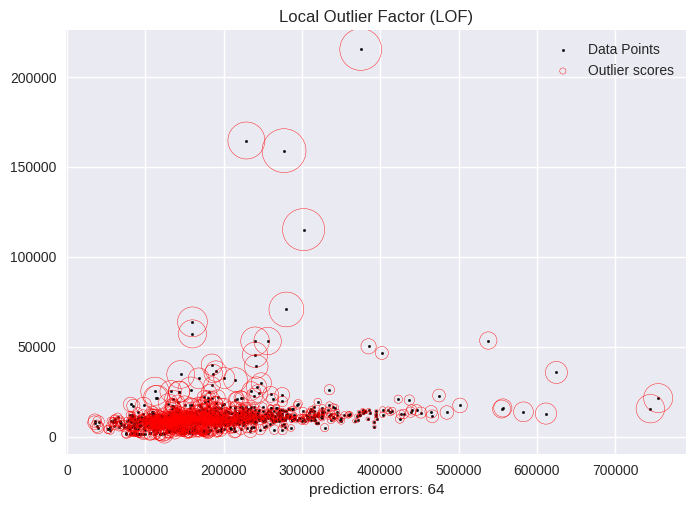

In [46]:
plt.scatter(X[:,0], X[:,1], color="k", s=3.0, label="Data Points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(X[:,0], X[:,1], s=1000*radius, edgecolors="r", facecolors="none", label="Outlier scores")
plt.axis("tight")
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_handler_marker_size)})
plt.title("Local Outlier Factor (LOF)")
plt.show()

## 2. PCA (35 points)

Accuracy Comparison for Logistic Regression model: before and after PCA.
Please follow the following steps:

  1. Seperate and standardize the disease classification dataset. (5 points)
  2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
  3. Primary Component Selection. (Select the first 6 components) (5 points)
  4. Projection in a New Feature Space. (5 points)
  5. Principal Component Analysis. (5 points)
  6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

Seperating the data into numerical and categorical columns

In [44]:
data2 = "/content/Q2_dataset.csv"

In [45]:
data2 = pd.read_csv(data2)
data2.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [46]:
data2.dtypes

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

In [47]:
data = data2.drop(['id', 'gender', 'class'], axis=1)
data

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,0.00008,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671
752,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,0.00016,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170
753,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,0.00011,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424
754,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,0.00017,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131


In [48]:
X = data
y = data2['class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
X_train.shape

(604, 752)

Standardizing the data

In [51]:
scaler = StandardScaler()
df = scaler.fit_transform(X_train)

In [52]:
df_meaned = df
df_meaned.shape

(604, 752)

In [53]:
df1 = pd.DataFrame(df_meaned)

Making the rows = column as we require a square matrix for eigen value decomposition. Adding zero columns which wont give any information.

In [54]:
result = df1.combine_first(df1.T).fillna(0.0)

In [55]:
result.shape

(752, 752)

In [56]:
result = result.to_numpy()
result

array([[ 0.47126094,  0.56016794, -1.30667773, ..., -0.73448598,
        -0.39539864, -0.61971077],
       [ 0.41159886,  0.32989777, -0.26548543, ..., -0.4423655 ,
        -0.61720284, -0.83269257],
       [ 0.51431667,  0.66609222, -0.11570599, ...,  1.08284854,
         1.91358583,  1.78676432],
       ...,
       [-0.73448598, -0.4423655 ,  1.08284854, ...,  0.        ,
         0.        ,  0.        ],
       [-0.39539864, -0.61720284,  1.91358583, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61971077, -0.83269257,  1.78676432, ...,  0.        ,
         0.        ,  0.        ]])

Eigen value decomposition

In [57]:
eigenvalues, eigenvectors = LA.eig(result)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

In [58]:
eigenvalues[:10]

array([ 132.75006395, -129.17322326,  -92.88186107,   88.00294636,
        -73.62893865,   74.12899238,   71.81928484,   65.69837507,
        -64.95178251,  -64.95178251])

In [59]:
eigenvectors[:3]

array([[ 0.01168307, -0.04630855, -0.00959803, ..., -0.00284882,
        -0.00262015, -0.00271742],
       [-0.01173647,  0.02445773,  0.02411508, ..., -0.00582301,
        -0.01225115, -0.01267565],
       [ 0.01617516, -0.02736427, -0.01765509, ...,  0.0014286 ,
        -0.00154386, -0.00164072]])

In [60]:
eigenpairs = []
for i in range(len(eigenvalues)):
  eigenpairs.append((eigenvalues[i], eigenvectors[i]))

In [61]:
covariancematrix = PCA(n_components = 10)
covariancematrix.fit(df)

PCA(n_components=10)

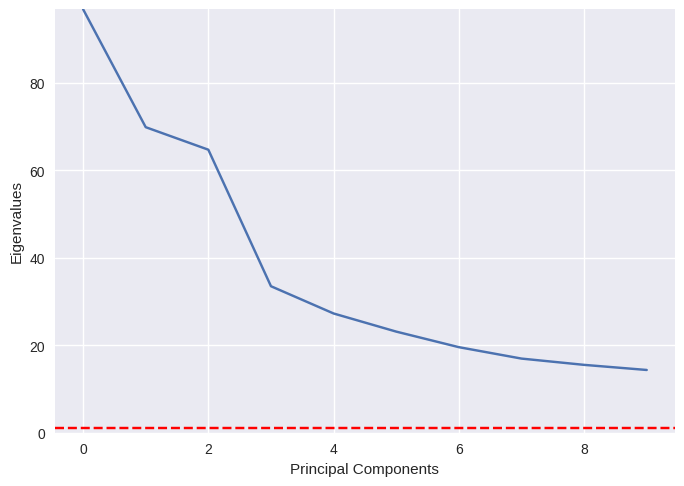

In [62]:
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.ylim(0, max(covariancematrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.plot(covariancematrix.explained_variance_)
plt.show()

In [63]:
explainedvariance = covariancematrix.explained_variance_ratio_
print(explainedvariance)

[0.12861733 0.09279395 0.08595264 0.04449205 0.03621372 0.03070807
 0.02598343 0.02251608 0.02060931 0.01905586]


Principal Component Selection

In [64]:
principal_components = explainedvariance[:6]
principal_components

array([0.12861733, 0.09279395, 0.08595264, 0.04449205, 0.03621372,
       0.03070807])

Projection in a New Feature Space

In [65]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalue = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:,sorted_index]

In [66]:
eigenvector_subset = sorted_eigenvectors[:,0:len(principal_components)]

In [67]:
X_reduced = np.dot(eigenvector_subset.transpose(), df_meaned.transpose()).transpose()
X_reduced.shape

(604, 6)

Logistic Regression before PCA

In [68]:
model = LogisticRegression(random_state=42)

In [69]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [70]:
y_pred = model.predict(X_test)

In [71]:
confusionmatrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

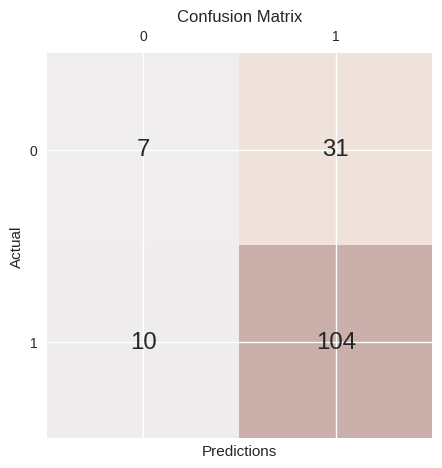

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusionmatrix, cmap = plt.cm.Oranges, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
  for j in range(confusionmatrix.shape[1]):
    ax.text(x=j, y=i, s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [73]:
precision = precision_score(y_test, y_pred)
precision

0.7703703703703704

In [74]:
recall = recall_score(y_test, y_pred)
recall

0.9122807017543859

Logisitic Regression after PCA

In [75]:
X_train = X_reduced
y_train = y_train

In [76]:
model = LogisticRegression(random_state=42)

In [77]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Preprocess X_test data now before applying PCA

In [79]:
dftest = scaler.transform(X_test)

In [80]:
Xtest_reduced = np.dot(eigenvector_subset.transpose(), dftest.transpose()).transpose()
Xtest_reduced.shape

(152, 6)

In [81]:
y_pred = model.predict(Xtest_reduced)

In [82]:
confusionmatrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

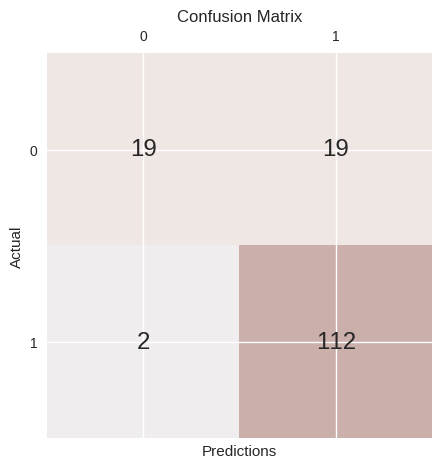

In [83]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusionmatrix, cmap = plt.cm.Oranges, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
  for j in range(confusionmatrix.shape[1]):
    ax.text(x=j, y=i, s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

Precision = TP / ( FP + TP )

In [84]:
precision = precision_score(y_test, y_pred)
precision

0.8549618320610687

Recall = TP / ( FN + TP )

In [85]:
recall = recall_score(y_test, y_pred)
recall

0.9824561403508771

## 3. EM Algorithm (35 points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).
There are 5 paramaters to estimate: 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.
The probability density function (PDF) of the mixture model is: 𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎2^2)
Your goal is to best fit a given probability density by finding 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) through EM iterations.

Using the following way to produce data:
```python
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

```

(1) Using a single Gaussion to estimate and draw a picure to see the result: (5 points)
```python
class Gaussian:
"Model univariate Gaussian"
def __init__(self, mu, sigma):
    #mean and standard deviation


#probability density function
def pdf(self, datum):
    "Probability of a data point given the current parameters"
```

(2) Using a 2 Gaussian mixture model to estimate and draw a picture to see the result(Do not use sklearn GaussianMixture): (30 points)
```python
class GaussianMixture_self:
"Model mixture of two univariate Gaussians and their EM estimation"

def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):


def Estep(self):
    "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"

def Mstep(self, weights):
    "Perform an M(aximization)-step"

def iterate(self, N=1, verbose=False):
    "Perform N iterations, then compute log-likelihood"

def pdf(self, x):
        
```

In [97]:
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

In [98]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (((2 * pi) ** 1/2) * abs(self.sigma))) * exp(-u * u / 2)
        return y

In [99]:
mu = data.mean()
sigma = data.std()

gaussain = Gaussian(mu, sigma)

gaussain1 = Gaussian(y1.mean(), y1.std())
gaussain2 = Gaussian(y2.mean(), y2.std())

x = np.linspace(min(data), max(data), num=1000)

l1, l2 = [], []
for i in x:
  l1.append(gaussain1.pdf(i))
for j in x:
  l2.append(gaussain2.pdf(j))

pdf1 = np.array(l1)
pdf2 = np.array(l2)

<ipython-input-100-2442c6c43fe2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y1, hist=False, color='black')


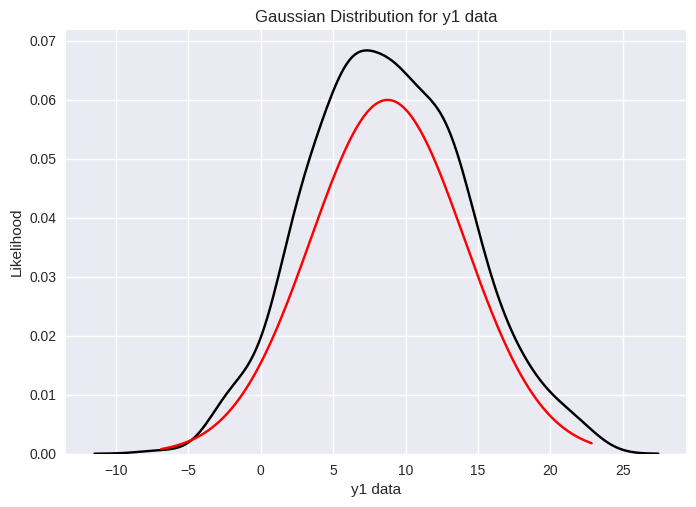

In [100]:
sns.distplot(y1, hist=False, color='black')
plt.plot(x, pdf1, color='red')
plt.title('Gaussian Distribution for y1 data')
plt.xlabel('y1 data')
plt.ylabel('Likelihood')
plt.show()

<ipython-input-101-ac2cb69940ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y2, hist=False, color='black')


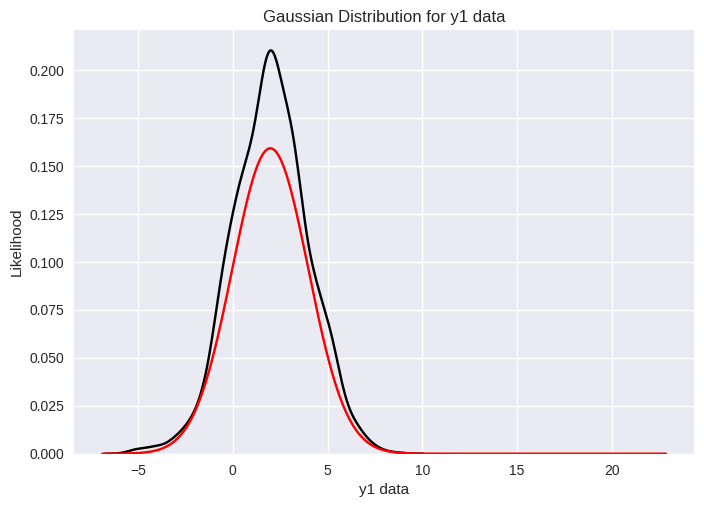

In [101]:
sns.distplot(y2, hist=False, color='black')
plt.plot(x, pdf2, color='red')
plt.title('Gaussian Distribution for y1 data')
plt.xlabel('y1 data')
plt.ylabel('Likelihood')
plt.show()

In [102]:
x = np.linspace(min(data), max(data), num=1000)
l = []
for i in x:
  l.append(gaussain.pdf(i))
pdf = np.array(l)

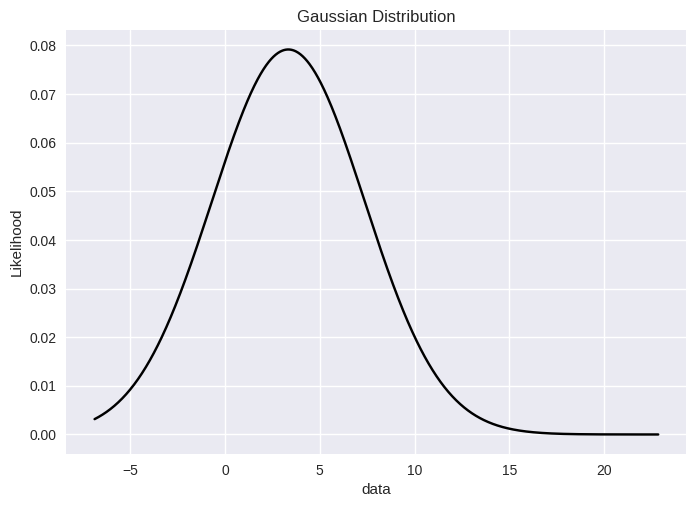

In [103]:
plt.plot(x, pdf, color='black')
plt.title('Gaussian Distribution')
plt.xlabel('data')
plt.ylabel('Likelihood')
plt.show()

In [104]:
class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        self.one = Gaussian(uniform(mu_min, mu_max), uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), uniform(sigma_min, sigma_max))
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        self.loglike = 0
        for datum in self.data:
            w1 = self.one.pdf(datum) * self.mix
            w2 = self.two.pdf(datum) * (1. - self.mix)
            den = w1 + w2
            w1 /= den
            w2 /= den
            self.loglike += log(den)
            yield (w1, w2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        (left, right) = zip(*weights)
        one_den = sum(left)
        two_den = sum(right)

        self.one.mu = sum(w * d / one_den for (w, d) in zip(left, self.data))
        self.two.mu = sum(w * d / two_den for (w, d) in zip(right, self.data))

        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, self.data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(right, self.data)) / two_den)
        self.mix = one_den / len(self.data)


    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        try:
          for i in range(1, N+1):
              self.Mstep(self.Estep())
              if verbose:
                  print('{0:2} {1}'.format(i, self))
          self.Estep()
        except StopIteration:
          pass
        return self

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)

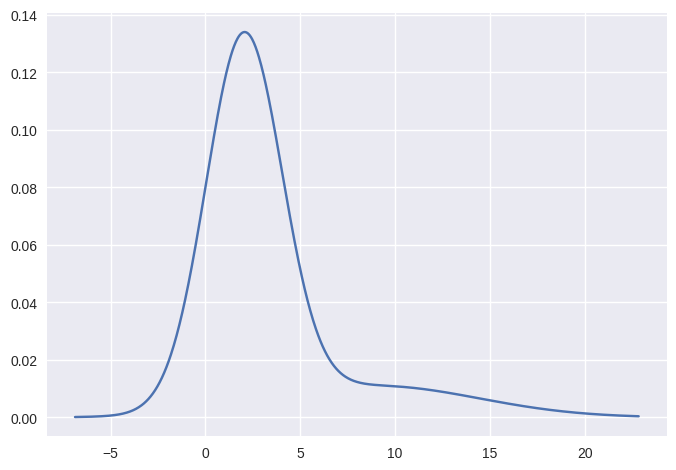

In [105]:
mix = GaussianMixture_self(data)
mix.iterate(N=50)
mixpdf = [mix.pdf(i) for i in np.linspace(min(data), max(data), num=1000)]
xvals = np.linspace(min(data), max(data), num=1000)
plt.plot(xvals, mixpdf)
plt.show()